## Import Libraries

In [1]:
from cProfile import label
from collections import OrderedDict
import numpy as np 
import torch 
import torch.nn as nn 
from torchvision import datasets, transforms
from torch import optim 
import torch.nn.functional as F 
import matplotlib.pyplot as plt 
from torch.utils.data import DataLoader

## Function to View Image and Prediction

In [2]:
def image_classify(img, ps):
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.show()

    return 

## Examples of Transformation Properties

In [ ]:
""" Defining the Transformations for Preprocessing 
url = 'https://www.analyticsvidhya.com/blog/2021/04/10-pytorch-transformations-you-need-to-know/'

    1.  ToTensor                transform = transforms.Compose([transforms.ToTensor()])
    2.  Normalize               transforms.Normalize([mean_chanel1, mean_channel2, mean_channel3], [std_channel1, std_channel2, std_channel3])
    3.  CenterCrop              transforms.Compose([transforms.CenterCrop((height, width))])
    4.  RandomHorizontalFlip    transforms.Compose([transforms.RandomHorizontalFlip(p=0.9)])   # p is the probability 
    5.  RandomRotation          transforms.Compose([transforms.RandomRotation(degrees=180)])
    6.  Grayscale               transforms.Compose([transforms.Grayscale(number_output_channels=1)])
    7.  GaussianBlur            transforms.Compose([transforms.GaussianBlur(kernel_size=501)]) 
    8.  RandomApply             transforms.RandomApply([transforms.RandomSizedCrop(200),transforms.RandomHorizontalFlip()],p=0.6)
    9.  Compose                 transforms.Compose([transforms.Grayscale(1),transforms.CenterCrop(10), transforms.ToTensor()])      # t composes several transforms together.
    10. Functional Transforms

"""

In [3]:
batch_size=32

transform = transforms.Compose([   transforms.ToTensor(), 
                                   transforms.Normalize((0.5), (0.5))
                                ])

## Download and Load Data

In [ ]:
train_datasets = datasets.MNIST(root='data', download=True, train=True,  transform=transform)
test_datasets  = datasets.MNIST(root='data', download=True, train=False, transform=transform)

train_loader = DataLoader(dataset=train_datasets, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(dataset=test_datasets,  batch_size=batch_size, shuffle=True)

## Data Iteration

In [6]:
data_iter = iter(train_loader)
images, labels = data_iter.next()

## Model

In [7]:
class model_MNIST(nn.Module):
    def __init__(self, input, output):
        super(model_MNIST, self).__init__()
        self.first_layer    = nn.Linear(input, 32)
        self.second_layer   = nn.Linear(32, 32)
        self.third_layer    = nn.Linear(32, 32)
        self.last_layer     = nn.Linear(32, output)

        self.relu       = nn.ReLU()
        self.softmax    = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu( self.first_layer(x) )
        x = self.relu( self.second_layer(x) )
        x = self.relu( self.third_layer(x) )
        x = self.last_layer(x) 
        x = self.softmax(x)
        return x


## Instatiate Model, Criterion, and Optimizer

In [9]:
num_input, num_output, epochs = 784, 10, 10
model = model_MNIST(num_input, num_output)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Train the Model

In [10]:
train_losses_list, test_losses_list = [], []

for epoch in range(epochs):
    train_running_loss, test_running = 0, 0
    for train_idx, (features, targets) in enumerate(iter(train_loader)):
        features = features.resize_(features.size()[0], 784)
        optimizer.zero_grad()
        predictions = model.forward(features)
        train_loss = criterion(predictions, targets)
        train_loss.backward()
        optimizer.step()
        train_running_loss += train_loss.item()
    
    average_train_running_loss = train_running_loss/len(train_loader)
    train_losses_list.append(average_train_running_loss)

    model.eval()
    with torch.no_grad():
        for test_idx, (test_features, test_targets) in enumerate(iter(test_loader)):
            test_features = test_features.view(-1, 784)
            test_prediction = model.forward(test_features)
            test_loss = criterion(test_prediction, test_targets)
            # test_loss.backward()
            # optimizer.step()
            test_running += test_loss.item()
        
        average_tesr_running_loss = test_running/len(test_loader)
        test_losses_list.append(average_tesr_running_loss)

    model.train()

    print(f'epoch {epoch+1:3}/{epochs:3}     Train Loss : {average_train_running_loss:.5f}    Test Loss : {average_tesr_running_loss:.5f}')

epoch   1/ 10     Train Loss : 1.72387    Test Loss : 1.64149
epoch   2/ 10     Train Loss : 1.62515    Test Loss : 1.58169
epoch   3/ 10     Train Loss : 1.55583    Test Loss : 1.54134
epoch   4/ 10     Train Loss : 1.54455    Test Loss : 1.53411
epoch   5/ 10     Train Loss : 1.53930    Test Loss : 1.53144
epoch   6/ 10     Train Loss : 1.53360    Test Loss : 1.53072
epoch   7/ 10     Train Loss : 1.53027    Test Loss : 1.52169
epoch   8/ 10     Train Loss : 1.52658    Test Loss : 1.52652
epoch   9/ 10     Train Loss : 1.52457    Test Loss : 1.51957
epoch  10/ 10     Train Loss : 1.52271    Test Loss : 1.52619


## Plot the Results

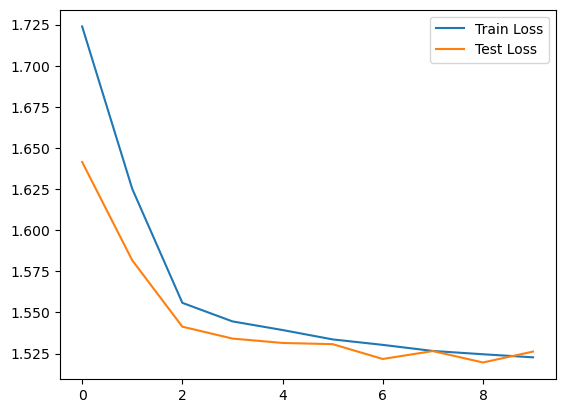

In [11]:
plt.plot(train_losses_list, label='Train Loss')
plt.plot(test_losses_list,  label='Test Loss')
plt.legend()
plt.show()